# Transformée de Fourier discrète

Dans ce notebook, nous allons utiliser la transformée de Fourier discrète. 
Cette transformée est une application qui envoie un vecteur de $\mathbb{C}^N$ sur un vecteur de $\mathbb{C}^N$, où $\mathbb{C}^N$ est muni du produit scalaire suivant 
$$\langle f,g\rangle=\sum_{k=0}^{N-1}f[k]\overline{g[k]}.$$
Cette application linéaire est définie par la formule suivante : pour tout $k\in\{ 0: N-1\}$
$$\hat{f}[k]=\sum_{n=0}^{N-1}f[n]e^{-\frac{2i\pi kn}{N}}$$
Elle peut être vu comme un changement de base orthogonale. En effet si on lit les valeurs $f[k]$ aux composantes du vecteur $f$ dans la base canonique alors les valeurs $\hat f[k]$ peuvent être vues comme les produits scalaires de $f$ avec le vecteur $e_k$ défini par 
$$e_k[n]=e^{\frac{2i\pi kn}{N}}.$$
Ce vecteur est appelé exponentielle complexe discrète. La famille des exponentielles discrètes pour $k\in\{ 0: N-1\}$ forme une base orthogonale de $\mathbb{C}^N$. Ce n'est pas une base orthonormée car les vecteurs sont tous de norme $N$, ainsi la famille $(\frac{1}{\sqrt{N}}e_k)_{k\in\{ 0: N-1\}}$ forme une base orthonormée. On en déduit la formule de reconstruction suivante :
$$f[n]=\frac{1}{N}\sum_{k=0}^{N-1}\hat f[k]e^{\frac{2i\pi kn}{N}}$$.
On dit que $\hat f$ permet de représenter $f$ dans le domaine des fréquences.
On appellera parfois le coefficient $\hat f[k]$ la $k$ième fréquence de $f$.\\
Comme pour les faibles valeurs de $k$, les composantes des vecteurs $e_k$ osccillent peu, on parle de basses fréquences. Pour les grandes valeurs de $k$ on dit que $\hat f[k]$ est un coefficient de haute fréquence.\\
Une chose importante à avoie en tête est que la transformée de Fourier d'un vecteur doit être vue comme un objet périodique, c'est à dire une suite infinie dont on affiche une période. Une des conséquences de ceci est que les hautes fréquences se situent au milieu. Les plus grandes valeurs de $k$, comme $N-2$ ou $N-1$ peuvent être vues comme des basses fréquences négatives car $N-1\equiv -1\,[N]$. On peut le vérifier simplement en affichant $e_1$ et 
$e_{N-1}$.

La commande qui permet de calculer la transformée de Fourier discrète est fftpack.fft et celle de la transformée inverse est fftpack.ifft. Les fonctions python associées sont isssues su package scipy. Nous utiliserons quelques vecteurs de références qu'il faudra télécharger sur moodle dans des fichiers .mat
Le terme fft désigne un algorithme calculant la transformée de Fourier discrète : il s'agit de la Fast Fourier Transform qui est vraiment rapide quand $N$ est une puissance de 2. C'est pourquoi la plupart des vecteurs que nous utiliserons auront des tailles qui sont des puissances de 2. 

La Transformée discrète est une transformée de $\mathbb{C}^N$ dans $\mathbb{C}^N$ mais on peut aussi la voir 
comme une discrétisation du calcul des coefficients d une fonction périodique. En effet si $f$ est une fonction 
continue par morceaux 
définie sur $\mathbb{R}$ et $2\pi$-périodique on a 
$$c_n(f)=\frac{1}{2\pi}\int f(t)e^{-int}dt\approx \frac{1}{N}\sum_{k=0}^{N-1} f(\frac{2\pi k}{N})e^{-\frac{2i\pi kn}{N}}$$
Où l'approximation est celle d'une intégrale sur $[0,2/pi]$ par une somme de Riemann sur $N$ points.\\
Ainsi pour de grandes valeurs de $N$ on peut déduire le comportement des composantes $\hat f[k]$ du vecteur $\hat f$ en les considérant comme des versions approchées des coefficients de Fourier d'une fonction $\tilde f$, $2\pi$ périodique telle que $f[k]\approx \tilde f(\frac{2\pi k}{N})$.\\
Ainsi la décroissance des coefficients de Fourier d'une fonction continue $2\pi-$périodique est liée à la régularité
de celle ci. Nous verrons qu'on peut observer une telle décroissance sur la TF discrète.\\


# Visualisation de la fft de différents signaux.

In [39]:
import numpy as np
import scipy as scp
from math import *
import pywt
import matplotlib.pyplot as plt
import scipy.io as sio
import random
from scipy import fftpack
from IPython.display import display, Math, Latex
from scipy.io.wavfile import read
SS= sio.loadmat('Piece2.mat')
SS2= sio.loadmat('Blocks.mat')
Saxo=sio.loadmat('Saxo.mat')
St1=SS['S']
St2=SS2['S']
S1=St1[0]
S2=St2[0]
Saxo1=Saxo['S']
Saxo2=Saxo['S1']
temp=np.zeros(913)
for k in range(0,913):
    temp[k]=Saxo2[k]
Saxo2=temp

Question 1: Calculer et afficher sur deux graphiques différents les vecteurs et le module de la DFT pour les signaux de référence. 

In [90]:
fftS1 = scp.fftpack.fft(S1)
fftS2 = scp.fftpack.fft(S2)
fftSaxo2 = scp.fftpack.fft(Saxo2)

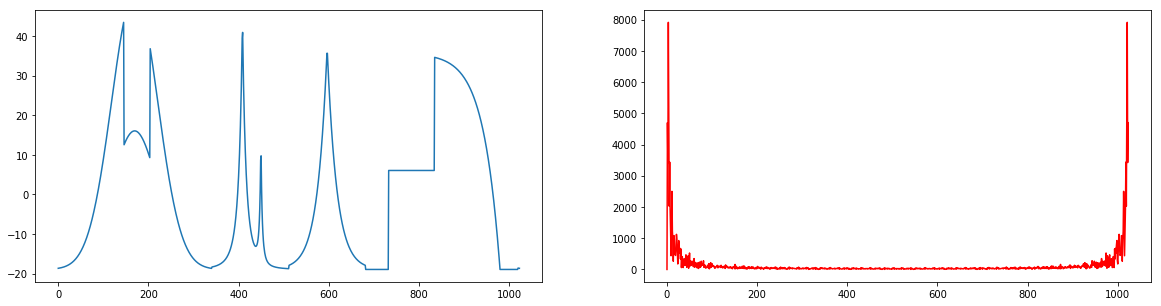

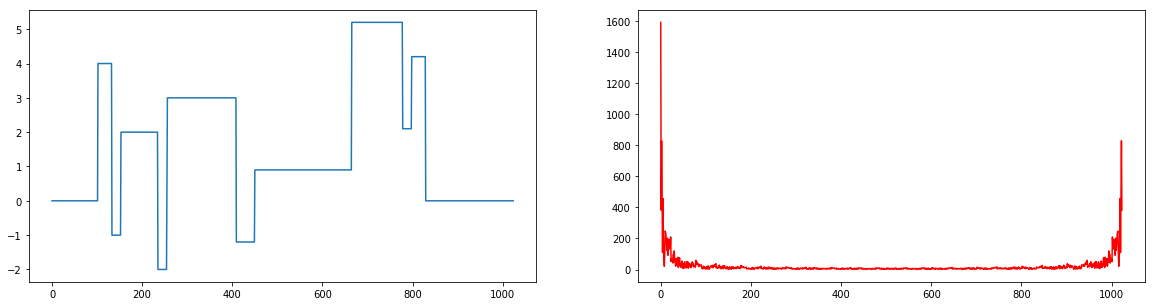

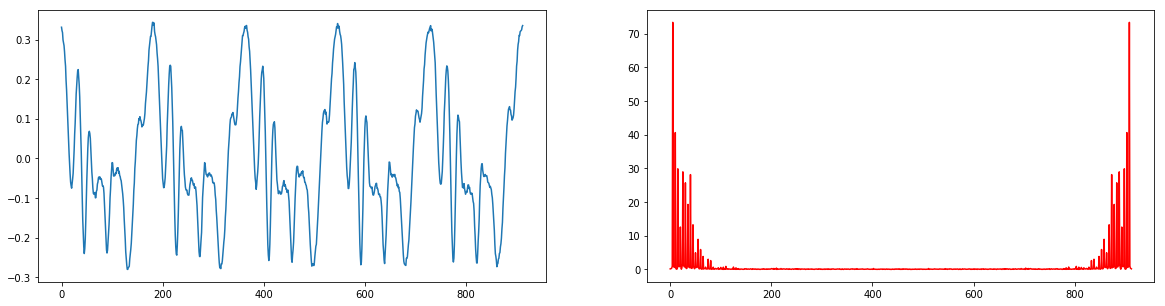

In [96]:
fig = plt.figure(1, figsize=(20, 5))
plt.subplot(121)
plt.plot(S1)
plt.subplot(122)
plt.plot(np.abs(fftS1),'r')
plt.show()

fig = plt.figure(2, figsize=(20, 5))
plt.subplot(121)
plt.plot(S2)
plt.subplot(122)
plt.plot(np.abs(fftS2),'r')
plt.show()

fig = plt.figure(3, figsize=(20, 5))
plt.subplot(121)
plt.plot(Saxo2)
plt.subplot(122)
plt.plot(np.abs(fftSaxo2),'r')
plt.show()

Question 2 : Ecrire des fonctions qui génèrent des gaussiennes, des fonctions indicatrices d'intervalle, une fonction rampe et un peigne de Dirac.

In [129]:
def Gaussienne(N,sigma2,b):
    x = np.linspace(-b,b,N)
    y = 1/(sqrt(sigma2*2*pi))*np.exp(-x**2/(2*sigma2))
    return x,y
def Porte(N,d,f):
    x = np.arange(N)
    y = np.zeros(N)
    for i in range((int)(d+1),(int)(f)):
        y[i] = 1
    return x,y
def Dirac(N,T):
    x = np.arange(N)
    y = np.zeros(N)
    n = (int)(N/T)
    for i in range(n):
        y[i*T] = 1
    return x,y
def Rampe(N,a,b):
    x = np.linspace(-b,b,N)
    y = np.zeros(N)
    y = a*x
    y[y<0] = 0
    return x,y

Question 3 : Calculer et afficher sur deux graphiques différents les vecteurs et le module de la DFT pour les signaux précédents en faisant varier les paramètres. Que vaut la TF discrète d'un peigne de Dirac quand la distance entre deux impulsions est un diviseur de la taille du Signal ?


Question 4 : Essayez de relier ce que vous observez à ce que vous connaissez des transformées et des coefficients de Fourier.

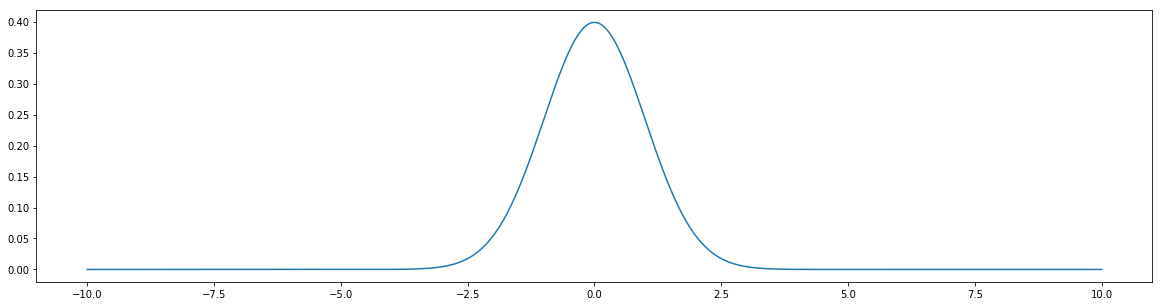

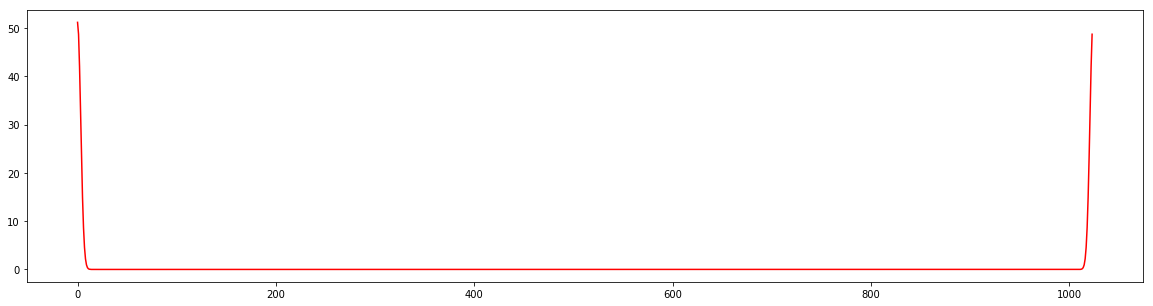

In [140]:
x,y = Gaussienne(1024,1,10)
ffty = scp.fftpack.fft(y)
fig = plt.figure(1, figsize=(20, 5))
plt.plot(x,y)
fig = plt.figure(2, figsize=(20, 5))
plt.plot(np.abs(ffty),'r')
plt.show()

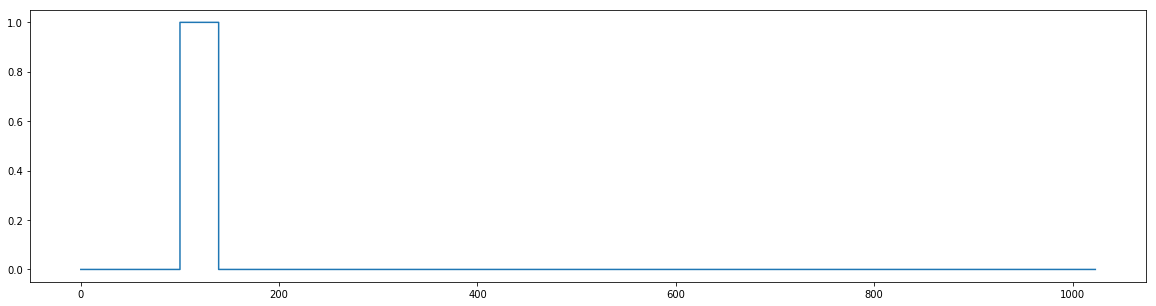

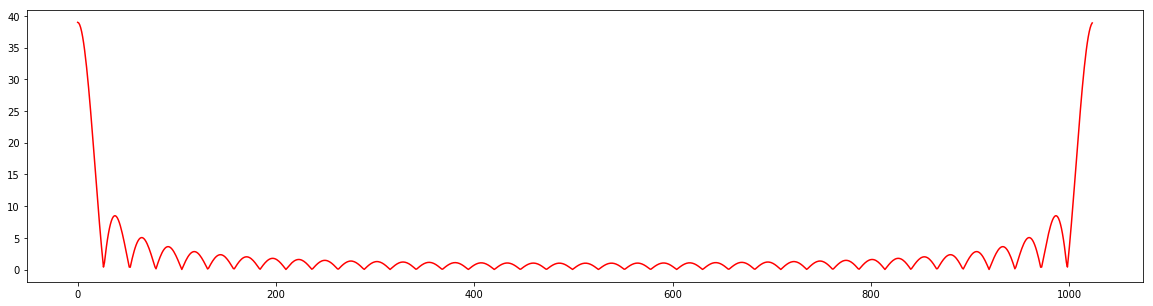

In [86]:
x,y = Porte(1024,100,140)
ffty = scp.fftpack.fft(y)
fig = plt.figure(1, figsize=(20, 5))
plt.step(x,y)
fig = plt.figure(2, figsize=(20, 5))
plt.plot(np.abs(ffty),'r')
plt.show()

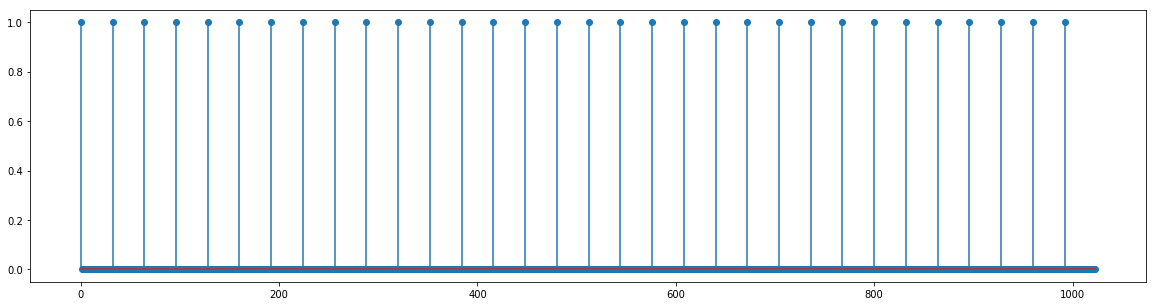

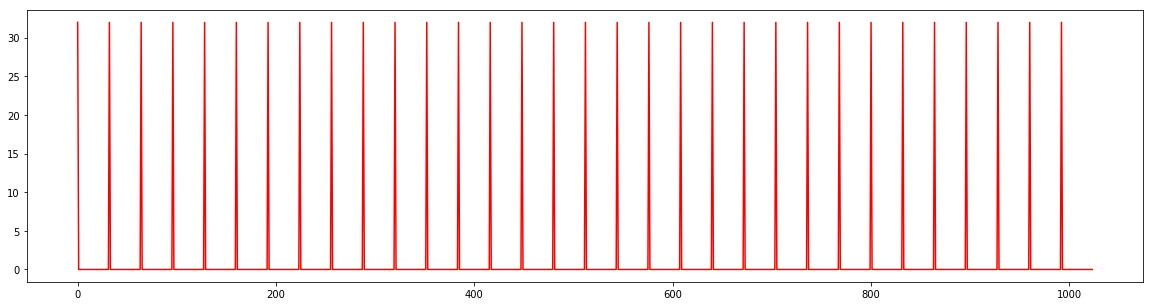

In [108]:
x,y = Dirac(1024,32)
ffty = scp.fftpack.fft(y)
fig = plt.figure(1, figsize=(20, 5))
plt.stem(x,y)
fig = plt.figure(2, figsize=(20, 5))
plt.plot(np.abs(ffty),'r')
plt.show()

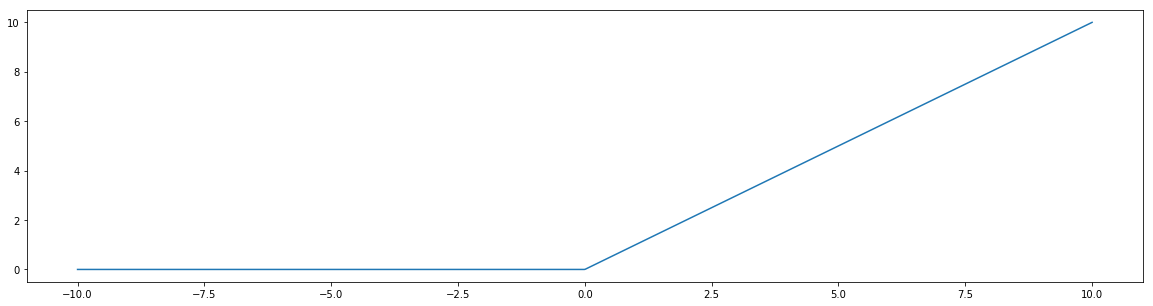

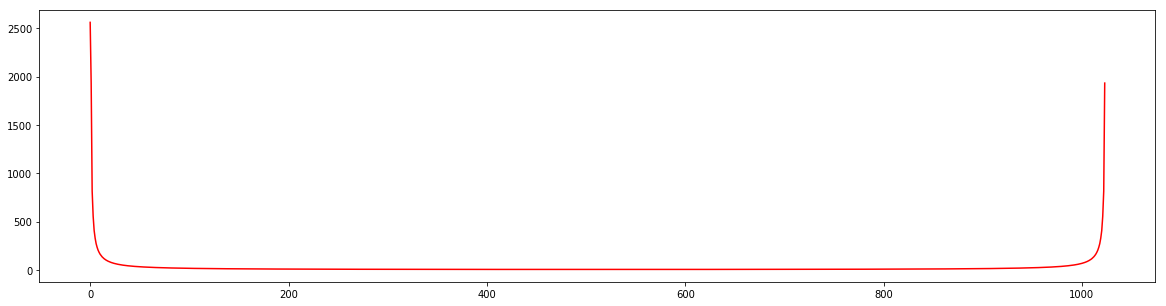

In [131]:
x,y = Rampe(1024,1,10)
ffty = scp.fftpack.fft(y)
fig = plt.figure(1, figsize=(20, 5))
plt.plot(x,y)
fig = plt.figure(2, figsize=(20, 5))
plt.plot(np.abs(ffty),'r')
plt.show()

# Approximation linéaire et non linéaire.

Question 5 : Ecrire une fontion qui prend en entrée un veceteur $f$ et qui renvoie son approximation linéaire $S^l_m(f)$ dans la base des $(e_k)$. Dans ce cas $S_m^l(f)$ est défini comme la projection orthogonale sur l'espace vectoriel engendré par les $2m+1$ vecteurs $(e_k)_{k\in\{0:m\}\cup \{N-m,N-1\}}$  

In [113]:
def SommePartielle(f,m):
    fftf = scp.fftpack.fft(f)
    N = len(fftf)
    fftf[m+1:N-m] = 0
    return fftf

Question 6 : Afficher sur une même figure pour différentes valeurs de $m$, un vecteur et son approximation linéaire. On testera plusieurs choix de vecteurs dont au moins les deux premiers de référence et la fonction rampe.

Question 7 : Qu'observe-t-on au niveau des discontinuités même pour de grandes valeurs de $m$ ?

Question 8 : Ce phénomène est appelé Phénomène de Gibbs. En quoi est ce compatible avec la convergence $\ell_2$ des sommes partielles de Fourier.

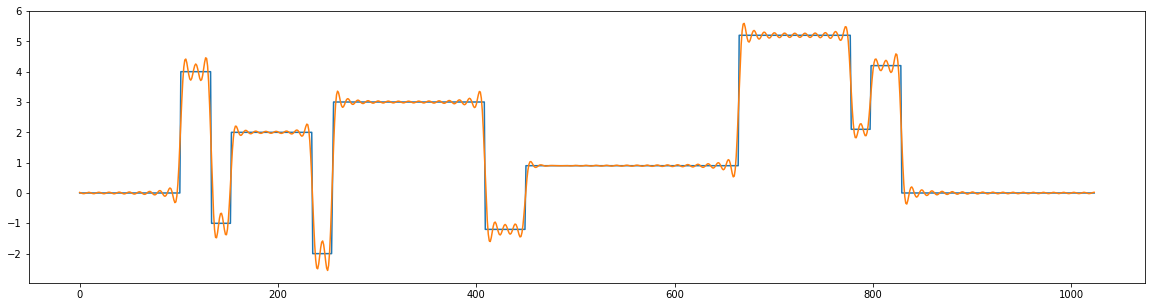

In [148]:
Sp2=SommePartielle(S2,100)
iSp2 = scp.fftpack.ifft(Sp2)
fig = plt.figure(1, figsize=(20, 5))
plt.plot(S2)
plt.plot(iSp2.real)
plt.show()

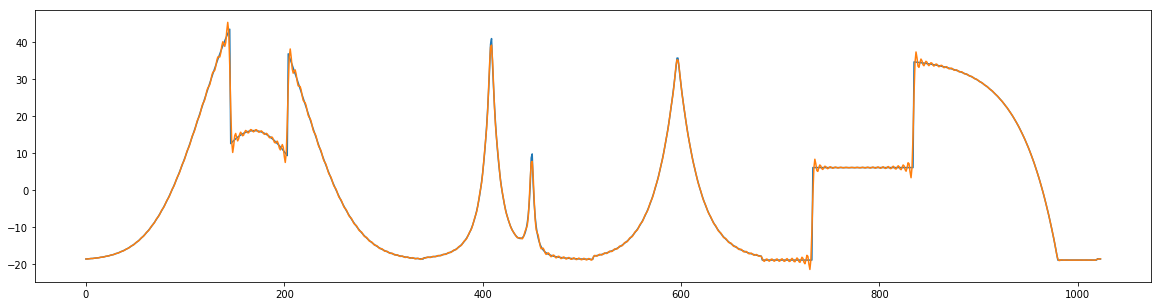

In [149]:
Sp1=SommePartielle(S1,200)
iSp1 = scp.fftpack.ifft(Sp1)
fig = plt.figure(1, figsize=(20, 5))
plt.plot(S1)
plt.plot(iSp1.real)
plt.show()

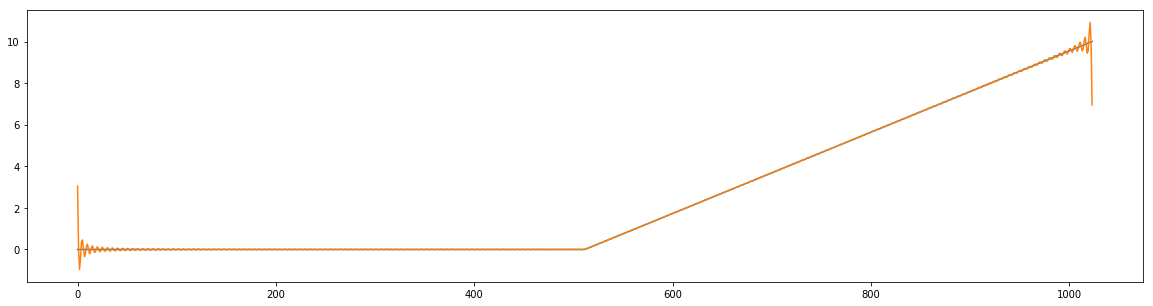

In [150]:
x,rampe = Rampe(1024,1,10)
Sprampe=SommePartielle(rampe,200)
iSprampe = scp.fftpack.ifft(Sprampe)
fig = plt.figure(1, figsize=(20, 5))
plt.plot(rampe)
plt.plot(iSprampe.real)
plt.show()

Question 9 : Ecrire un programme qui prend en entrée un vecteur $S$ et renvoie le vecteur formé des erreur d'approximation linéaire associée pour $m$ variant de 0 à $200$. On calculera une erreur renormalisée en divisant par $\Vert S\Vert_2^2$.

Question 10 : Afficher cette courbe pour différents vecteurs. 
On pourra en afficher 3 ou 4 sur la même figure. 

Question 11 : Parmi ces vecteurs quel commentaire peut-on faire sur la courbe d'erreur associée à la gaussienne ? Sur la petit extrait de saxo ?

In [133]:
def ErreurLin(S):
    Norme = np.sum(S**2)
    fftS = scp.fftpack.fft(S)
    d = (int)(len(fftS)/2)
    temp = [abs(fftS[d])**2]
    for i in range(1,d):
        s = abs(fftS[d+i])**2+abs(fftS[d-i])**2
        temp.append(s)
    er=np.cumsum(temp)/Norme
    er=np.flip(er,axis=0)
    er=er[0:201]
    return er

In [141]:
x,g = Gaussienne(1024,1,10)

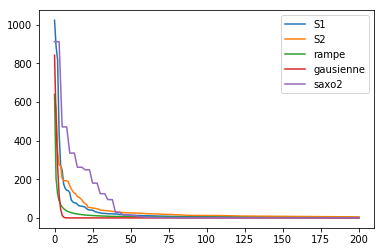

In [143]:
er1=ErreurLin(S1)
er2=ErreurLin(S2)
errampe=ErreurLin(rampe)
erg=ErreurLin(g)
ersx2=ErreurLin(Saxo2)
plt.plot(er1,label='S1')
plt.plot(er2,label='S2')
plt.plot(errampe,label='rampe')
plt.plot(erg,label='gausienne')
plt.plot(ersx2,label='saxo2')
plt.legend()
plt.show()

# Approximation non linéaire

Question 12 : Reprendre les mêmes questions pour l'approximation non linéaire.

In [175]:
def ApproxNonLin(S,N):
    AFS = scp.fftpack.fft(S)
    I=np.flipud(np.argsort(AFS))
    Nf = len(AFS)
    temp=np.zeros(Nf,dtype=complex)
    temp[I[:2*N+1]] = AFS[I[:2*N+1]]
    y=np.real(scp.fftpack.ifft(temp))
    return y

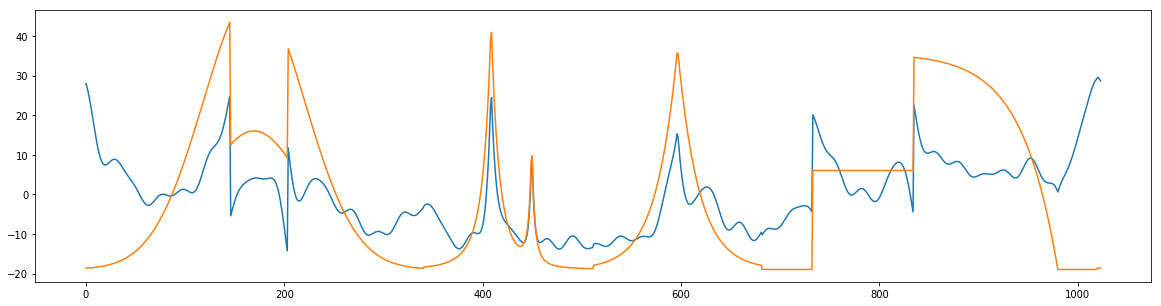

In [176]:
test=ApproxNonLin(S1,500)
fig = plt.figure(1, figsize=(20, 5))
plt.plot(test)
plt.plot(S1)
plt.show()

Question 13 : Comparez les approximations linéaires et non linéaires pour différentes valeurs de $m$ et différents vecteurs (On pourra afficher le vecteur original, et les deux approxiamtions sur la même figure). 

Question 14 : Afficher les deux courbes d'erreur sur le même graphique . 
Y a t il une différence notoire entre les deux approximations pour les deux premiers vecteurs de référence ? Pour une gaussienne ? Pour le petit extrait de saxo ? 

# Convolution discrète et circulaire

Si on considère deux vecteurs de $\mathbb{C}^N$ comme des périodes de suites infinies périodiques de période $N$, on peut définir la convolution circulaire $h$ de $f$ et $g$ de la manière suivante :
$$h[n]=f\star g[n]=\sum_{k=0}^{N-1}f[k]g[n-k]=\sum_{k=0}^{N-1}f[n-k]g[k].$$
Question 15 : Montrer que la suite ainsi définie vérifie pour tout $k\in\{ 0: N-1\}$, $\hat h[k]=\hat f[k]\hat g[k]$.

On en déduit qu'il est possible d'effectuer une convolution de la manière suivante :

In [ ]:
def Convcirc(S1,S2):
    y=np.real(fftpack.ifft(fftpack.fft(S1)*fftpack.fft(S2)))
    return y

Question 16 : Effectuer quelques tests de convolution entre des fonctions indicatrices, gaussiennes et séries d'impulsions en faisant varier les paramètres, pour comprendre l'effet de la convolution. On affichera les résultats.

Question 17 : Comment effectuer la translation périodique d'un signal avec une convolution ? Que se passe t il si on effectue la convolution d'un signal par un peigne de Dirac (tester avec 2, 4 ou 8 Dirac pour vous aider au besoin) ?

Question 18 : Effectuer la convolution des deux signaux de références par des gaussiennes (et par des gaussiennes décalées) en faisant varier la variance de la gaussienne. Commenter.

In [ ]:
N=1024
g=Gaussienne(N,0.5,16)
g2=fftpack.fftshift(g)
D=np.zeros(N)
D[300]=1
D[600]=-1
y=Convcirc(D,g2)
plt.plot(y)
plt.show()

# Echantillonnage

L'échantillonnage d'un signal disret (ou d'un vecteur) consiste à en extraire certaines valeurs à intervalle régulier. 
Par exemple tous les 2 ou 5 échantillons. Pour bien comprendre l'effet de l'échantillonnage sur le spectre (la TF discrète d'un signal), on peut échantillonner un signal en ne conservant qu'une valeur à intervalle régulier et mettre les autres à 0. On conserve ainsi un vecteur de même dimension que le signal original. 

Question 19 : Ecrire une fonction d'échantillonnage qui prend en entrée un signal S et une période $d$ et qui renvoie un signal de même dimension échantillonné. 

Question 20 : Afficher le résultat pour différents vecteurs.

In [ ]:
def Echan1(S,d):
   
    return y
    

In [ ]:
y=Echan1(S,5)
fig = plt.figure(1, figsize=(20, 5))
plt.plot(y)
plt.show()

Question 20 : Afficher sur deux figures séparées les TF discrètes du signal original et du signal échantillonné.

Question 21 : Justifier qu'on peut interpréter un tel échantillonnage comme une multiplication par un Peigne de Dirac.
En déduire l'effet dans le domaine de Fourier d'une telle multiplication. 

Question 22 : Comment reconstruire, même approximativement le signal original, à partir du Signal échantillonné ?

Question 23 : La reconstruction peut-elle parfaite ? A quelle condition sur la fréquence (ou période ) d'échantillonnage.

In [ ]:
Fy=abs(fftpack.fft(y))
fig = plt.figure(1, figsize=(20, 5))
plt.plot(Fy)
plt.show()